Usando um dataset de exemplo, utilizamos dois algoritmos de exemplo ao que será usado na aplicação, kmeans para separar os clientes e keras para prever a classsificação

In [67]:
# Importando os bibliotecas:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from keras.models import Sequential
from keras.layers import Dense

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

In [68]:
df= pd.read_excel('/content/Online Retail.xlsx')

In [69]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [70]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [72]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [73]:
df1 = df.iloc[:, [3, 4, 5, 6]]
df1

,Quantity,InvoiceDate,UnitPrice,CustomerID
0,6,2010-12-01 08:26:00,2.55,17850.0
1,6,2010-12-01 08:26:00,3.39,17850.0
2,8,2010-12-01 08:26:00,2.75,17850.0
3,6,2010-12-01 08:26:00,3.39,17850.0
4,6,2010-12-01 08:26:00,3.39,17850.0
...,...,...,...,...
541904,12,2011-12-09 12:50:00,0.85,12680.0
541905,6,2011-12-09 12:50:00,2.10,12680.0
541906,4,2011-12-09 12:50:00,4.15,12680.0
541907,4,2011-12-09 12:50:00,4.15,12680.0


In [74]:
df1['InvoiceDate'] = df1['InvoiceDate'].astype(int) / 10**9


In [75]:
df1['InvoiceDate'].value_counts()

InvoiceDate
1.320072e+09    1114
1.323336e+09     749
1.323425e+09     731
1.323106e+09     721
1.309363e+09     705
                ... 
1.317204e+09       1
1.317203e+09       1
1.300278e+09       1
1.300278e+09       1
1.300291e+09       1
Name: count, Length: 23260, dtype: int64

In [76]:

df1.isnull().sum()


Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
dtype: int64

In [77]:

df1 = df1.dropna(subset=['CustomerID'], axis=0)


In [78]:
df1 = df1.sample(100000, random_state=40)

In [79]:
distorcoes = []
K = range(1,10)
for k in K:
    modelo01 = KMeans(n_clusters=k)
    modelo01.fit(df1)
    distorcoes.append(modelo01.inertia_)

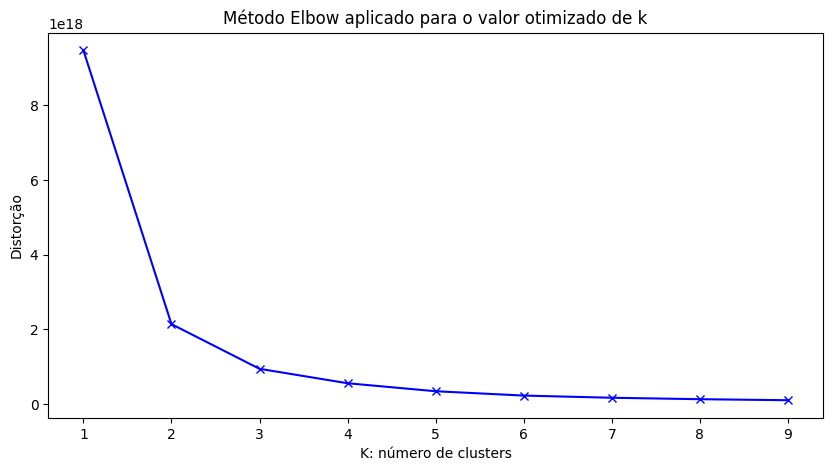

In [80]:
plt.figure(figsize=(10,5))
plt.plot(K, distorcoes, '-bx')

# Define os labels do eixos do gráfico:
plt.xlabel('K: número de clusters')
plt.ylabel('Distorção')

# Define um título para o gráfico:
plt.title('Método Elbow aplicado para o valor otimizado de k')

# Mostra o gráfico:
plt.show()

In [81]:
modelo_KMeans = KMeans(n_clusters=5)
modelo_KMeans.fit(df1)

KMeans(n_clusters=5)

In [82]:
df1['clusters'] = modelo_KMeans.predict(df1)

In [83]:
silhouette = silhouette_score(df1, df1['clusters'])
print(f"Silhouette score: {silhouette:.4f}")

Silhouette score: 0.5756


In [84]:

df1.rename(columns={'clusters': 'Classificação_cliente'}, inplace=True)


In [85]:
df1

,Quantity,InvoiceDate,UnitPrice,CustomerID,Classificação_cliente
132037,1,1.300969e+09,2.10,14606.0,0
273521,16,1.311251e+09,1.45,14298.0,4
372446,6,1.317634e+09,2.95,14193.0,2
155378,12,1.302710e+09,0.42,15640.0,0
149256,2,1.302183e+09,9.95,13005.0,0
...,...,...,...,...,...
399477,4,1.318771e+09,5.75,14088.0,1
279737,2,1.311695e+09,1.95,17238.0,2
233380,4,1.308576e+09,1.65,16713.0,4
185164,12,1.305114e+09,1.25,17489.0,4


In [88]:
df1.corr().round(4)

,Quantity,InvoiceDate,UnitPrice,CustomerID,Classificação_cliente
Quantity,1.0000,0.0038,-0.0019,0.0004,-0.0016
InvoiceDate,0.0038,1.0000,-0.0036,0.0002,-0.2461
UnitPrice,-0.0019,-0.0036,1.0000,-0.0042,0.0057
CustomerID,0.0004,0.0002,-0.0042,1.0000,0.0044
Classificação_cliente,-0.0016,-0.2461,0.0057,0.0044,1.0000


<Axes: title={'center': 'Distribuição de Frequências'}, xlabel='Classificação_cliente', ylabel='Cliente'>

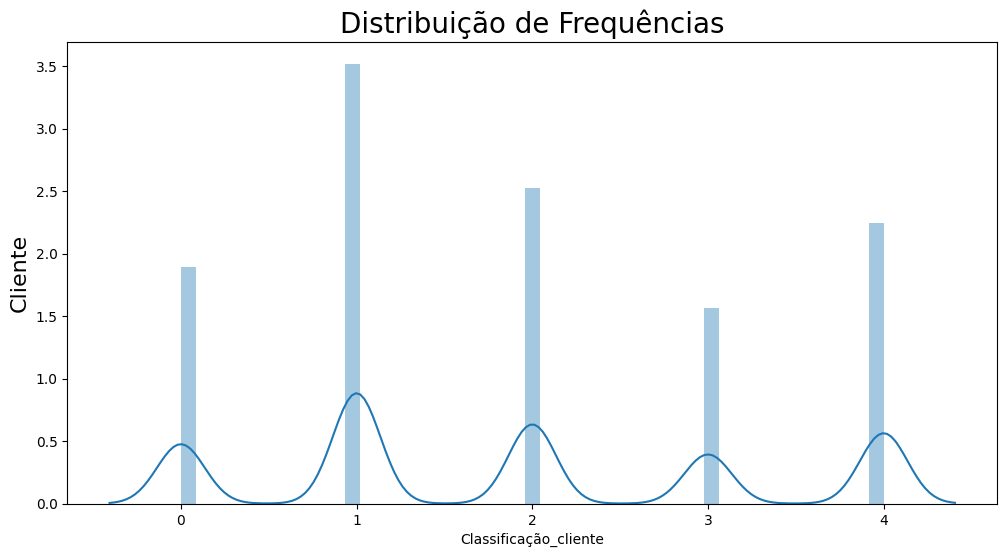

In [89]:
ax = sns.distplot(df1['Classificação_cliente'])

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_ylabel('Cliente', fontsize=16)

ax

In [90]:
df1.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,Classificação_cliente
count,100000.00000,1.000000e+05,100000.000000,100000.000000,100000.000000
mean,11.24428,1.310359e+09,3.531533,15283.645910,1.893370
std,243.25355,9.736240e+06,44.826931,1710.616753,1.352966
min,-74215.00000,1.291192e+09,0.000000,12346.000000,0.000000
25%,2.00000,1.302176e+09,1.250000,13959.000000,1.000000
50%,5.00000,1.312118e+09,1.950000,15150.000000,2.000000
75%,12.00000,1.319121e+09,3.750000,16788.000000,3.000000
max,12540.00000,1.323435e+09,8142.750000,18287.000000,4.000000


In [91]:
X = df1[['Quantity',	'InvoiceDate',	'UnitPrice',	'CustomerID']]
X

,Quantity,InvoiceDate,UnitPrice,CustomerID
132037,1,1.300969e+09,2.10,14606.0
273521,16,1.311251e+09,1.45,14298.0
372446,6,1.317634e+09,2.95,14193.0
155378,12,1.302710e+09,0.42,15640.0
149256,2,1.302183e+09,9.95,13005.0
...,...,...,...,...
399477,4,1.318771e+09,5.75,14088.0
279737,2,1.311695e+09,1.95,17238.0
233380,4,1.308576e+09,1.65,16713.0
185164,12,1.305114e+09,1.25,17489.0


In [92]:
y = df1['Classificação_cliente']
y

132037    0
273521    4
372446    2
155378    0
149256    0
         ..
399477    1
279737    2
233380    4
185164    4
241160    4
Name: Classificação_cliente, Length: 100000, dtype: int32

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=27)

In [94]:
y_train_array = y_train.to_numpy().reshape(-1, 1)
y_test_array = y_test.to_numpy().reshape(-1, 1)

In [95]:
encoder = OneHotEncoder(categories='auto')
y_train_encoded = encoder.fit_transform(y_train_array).toarray()
y_test_encoded = encoder.transform(y_test_array).toarray()

In [100]:
model = Sequential()

model.add(Dense(10, input_shape=(4,), activation='relu'))

model.add(Dense(8, activation='relu'))

model.add(Dense(5, activation='softmax'))



In [101]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [103]:
model.fit(X_train, y_train_encoded, epochs=100)

Epoch 1/100
2500/2500 [==============================] - 8s 3ms/step - loss: 1.5716 - accuracy: 0.2979
Epoch 2/100
2500/2500 [==============================] - 5s 2ms/step - loss: 1.5716 - accuracy: 0.2979
Epoch 3/100
2500/2500 [==============================] - 5s 2ms/step - loss: 1.5717 - accuracy: 0.2979
Epoch 4/100
2500/2500 [==============================] - 5s 2ms/step - loss: 1.5717 - accuracy: 0.2979
Epoch 5/100
2500/2500 [==============================] - 5s 2ms/step - loss: 1.5716 - accuracy: 0.2979
Epoch 6/100
2500/2500 [==============================] - 6s 2ms/step - loss: 1.5717 - accuracy: 0.2979
Epoch 7/100
2500/2500 [==============================] - 5s 2ms/step - loss: 1.5717 - accuracy: 0.2979
Epoch 8/100
2500/2500 [==============================] - 5s 2ms/step - loss: 1.5716 - accuracy: 0.2979
Epoch 9/100
2500/2500 [==============================] - 6s 2ms/step - loss: 1.5717 - accuracy: 0.2979
Epoch 10/100
2500/2500 [==============================] - 5s 2ms/step - l

In [104]:
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print(f'Acurácia do modelo: {accuracy}')

625/625 [==============================] - 1s 2ms/step - loss: 1.5669 - accuracy: 0.3061
Acurácia do modelo: 0.3061000108718872
